## BME 502 Midterm by Magdalene Fogarasi

## Part 1

## Process of Generating Function

If function defined by $$ f(x|\theta) = a +bx $$
Where $$\theta$$ is defined by the parameters $$(a,b)$$ with an error assumed to come from two Gaussian Distributions with bimodal error. Given that each of the distributions can be defined by the equation for the Gaussian with the same $\sigma$ as the width and each shifted $ +/- \Delta y = +/- 1$. The values of $\sigma$ and $\Delta y$ were chosen to make simplifying the equation easier analytically. 

Estimating $\sigma$ to be 1 (or assuming it is a constant) and also treating y as a constant it can be written as: $$(P(x|\theta)) = \prod (1/sqrt(2*\pi)) * [.5*exp(((-y_i - a - bx - 1)^2)/2) + .5*exp(((-y_i - a - bx + 1)^2)/2)]$$



This equation is for a single point. So in order to calculate the probability of a set of ${y_i}$ we need to multiply the probabilites of each point in the set.

In order to simplify and maximize this equation we can take the partial derivates for a and b in terms of x and y and set them equal to zero in order to see when the conditions will be met (find the roots). When we take the roots we can ignore the constants .

The roots of a function can be found using scipy.optimize

The work for this is attached as a hand written pdf. The a and b being subbed are constants. I think there is an error in the partials calculation because it should be in terms of just a and b and not x and y so I think I may have made a mistake while subsutiting. But the general idea I believe is correct.

## Part 2 

## Using Partials to Compute Parameters

Using the log likelihood and the partials in a and b, we can find the values for in which the partial in a and the partial in b are 0. 

The partials were computed by first using the identities:
(a+b)^2 = a^2 + 2ab + b^2, 
(a-b)^2 = a^2 - 2ab + b^2, 
Subbing in a = ($y_i$ - f(x|$\theta$)) and b = $\Delta$y

Then we can pull out the constants of the equation which simplify to the X^2 we calculated in class. 

In [161]:
%matplotlib inline
import numpy as np
import scipy.optimize as sciop
import matplotlib.pylab as plt
import math
import scipy.stats as stats

In [91]:
#find the roots of the function by taking the partials in terms of a and b with sigma .1
x=np.linspace(-5,5,11)
b = 2
y=b*x+np.random.normal(0,1,11)
a = 2
print(x)
print(y)
print(a,b)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
[ -9.64693137  -8.94174263  -7.11365404  -3.6736729   -1.07701336
  -0.07441566   0.45515786   3.56094567   5.17167299   8.62243189
  10.95658775]
2 2


In [210]:
def derivative(x0, x, y):
    a = x0[0]
    b = x0[1]
    a_der = (-100*(-a -b*x+y)) * (-2*math.tanh(2*(-a-b*x+y)))
    b_der = (100*x*(a+b*x-y)) * (-2*x*math.tanh(2*(-a-b*x+y)))
    return np.array([a_der, b_der])

In [215]:
#a and b points
print(sciop.root(derivative, x0=[2,2], args = (x[0], y[0])))

    fjac: array([[-0.03996804, -0.99920096],
       [ 0.99920096, -0.03996804]])
     fun: array([  2.01948392e-26,   5.04870979e-25])
 message: 'The solution converged.'
    nfev: 64
     qtf: array([ -2.55795324e-24,   1.44309495e-35])
       r: array([ -9.50047199e+02,  -8.44485295e+02,  -1.11925809e-20])
  status: 1
 success: True
       x: array([ 1.99092369,  2.01021007])


## Part 3

In [146]:
#generate some points with given bimodal errors from the code we wrote in class
x=np.linspace(-5,5,11)
chisq_list=[]
for i in range(1000):
    a=np.random.randint(0,2,size=11)
    error=np.where(a,np.random.normal(-2,0.1,11),np.random.normal(2,0.1,11))
    y=2*x+error
    p=np.polyfit(x,y,1)
    res=y-p[0]*x-p[1]
    chisq_list.append(np.sum(res**2))
print('x Data: ',x)
print('y Data: ',y)


x Data:  [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
y Data:  [ -8.06012667  -9.84915216  -8.00481116  -5.9648295    0.14365299
   1.90799102   0.11692015   1.97345285   4.02919154  10.01464509
   8.17009621]


In [147]:
yfit = p[1]+p[0]*x
print(yfit)

[-10.16382194  -8.23147518  -6.29912842  -4.36678167  -2.43443491
  -0.50208815   1.43025861   3.36260537   5.29495212   7.22729888
   9.15964564]


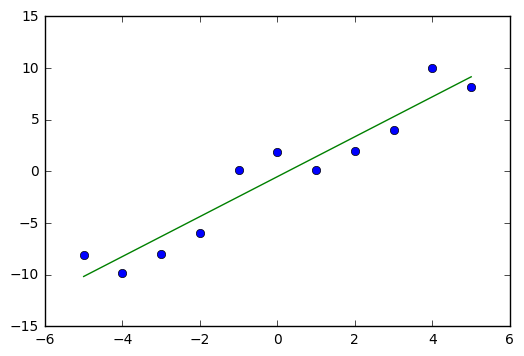

In [148]:
#generic polyfit auto generated as a baseline for "binning points"
plt.plot(x,y, "o")
plt.plot(x,yfit)

In [217]:
#bin the data into two sets, points greater than the fit line and points less than the fit line
top_y = []
top_x = []
bottom_y = []
bottom_x = []
on_fit = []
for index in range(len(x)):
    if y[index] > yfit[index]:
        top_y.append(y[index])
        top_x.append(x[index])
    elif y[index] < yfit[index]:
        bottom_y.append(y[index])
        bottom_x.append(x[index])
    else: #made a catch because once I ran this and it randomly generated a point 
        #on the orginial line so I assume it could happen rarely that the gaussian error added is 0
        on_fit.append(y[index])
#print("Points above: ", top_y)
#print("Points below: ", bottom_y)

In [150]:
print(top_y[-1], top_y[0])

10.0146450857 -8.06012666705


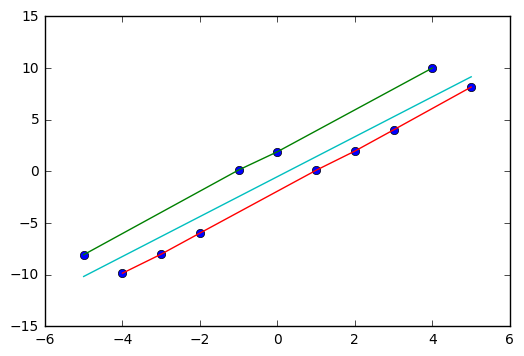

In [151]:
plt.plot(x,y, "o")
plt.plot(top_x, top_y)
plt.plot(bottom_x,bottom_y)
plt.plot(x, yfit)

In [152]:
#find slopes and intercept, diff in intercepts is delta y
top_slope = (abs(top_y[-1]-top_y[0]))/(abs(top_x[-1]-top_x[0]))
print('Slope of Top: ', top_slope)
bottom_slope = (abs(bottom_y[-1]-bottom_y[0]))/(abs(bottom_x[-1]-bottom_x[0]))
print('Slope of Bottom: ', bottom_slope)

m = (top_slope+bottom_slope)/2
print('Slope of Fit(m): ', m)

#calculate intercepts using b = y-mx
top_intercept = top_y[0] - (top_slope*top_x[0])
print('Top Intercept: ',top_intercept)
bottom_intercept = bottom_y[0] - (bottom_slope*bottom_x[0])
print('Bottom Intercept: ', bottom_intercept)
delta_y = (top_intercept - bottom_intercept)/2
print('Delta y: ', abs(delta_y))
b = (top_intercept + bottom_intercept)/2
print('Fit Intercept (b): ', b)


Slope of Top:  2.00830797253
Slope of Bottom:  2.00213870827
Slope of Fit(m):  2.0052233404
Top Intercept:  1.98141319561
Bottom Intercept:  -1.84059733153
Delta y:  1.91100526357
Fit Intercept (b):  0.0704079320387


In [153]:
y2 = m*x + b
print([x,y2])

[array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]), array([ -9.95570877,  -7.95048543,  -5.94526209,  -3.94003875,
        -1.93481541,   0.07040793,   2.07563127,   4.08085461,
         6.08607795,   8.09130129,  10.09652463])]


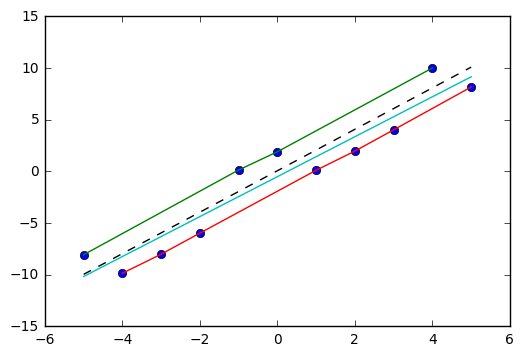

In [154]:
#Graph the points, the orginial polyfit line, the two fits, and the final correctly fit lines using optimized chi squared
plt.plot(x,y, "o") 
plt.plot(top_x, top_y)
plt.plot(bottom_x,bottom_y)
plt.plot(x,y2, 'k--')
plt.plot(x,yfit)

In [216]:
#chi sq test, expected value is N-df
print('Expected Chi Sqared Value: ', len(x)-4)

#chi sq = SUM[((y_i_obs - y_i_model)**2/sigma_i)]
#using the two line fits as an equilivent to the chi squared
y2 = m*x + b
yt = top_slope*x + top_intercept
yb = bottom_slope*x + bottom_intercept
chi_calc = []

for index in range(len(y2)):
    if y[index] > y2[index]: #top line chi squared
        chi_calc.append(((yt[index] - yb[index])**2 /delta_y))
    elif y[index] < y2[index]: #bottom line chi squared
        chi_calc.append(((yt[index] - yb[index])**2 /delta_y))
    else: #this is a catch in case some of the orginial points were on the poly fit
        chi_calc.append(((y2[index]- y2[index])**2 /delta_y))
chi_calc = np.array(chi_calc)
#print('Calculated Chi Squared with fit line: ',np.sum(chi_calc))   
print('Calculated "Chi Squared" with fit lines: ',chi_calc.mean())   

Expected Chi Sqared Value:  7
Calculated "Chi Squared" with fit lines:  7.64422021554


The final grahp shows the "chi squared fit" from the two parallel lines with the orginial fit rather than in a bar graph. 